In [45]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [6]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [7]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled = StandardScaler().fit_transform(df_market_data)
scaled


array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [9]:
# Create a DataFrame with the scaled data
df = pd.DataFrame(scaled)

# Copy the crypto names from the original data and set as index
coin_id = df_market_data.index
df.set_index(coin_id, inplace=True)

# Display sample data
df.head()

,0,1,2,3,4,5,6
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [11]:
# Create an empty list to store the inertia values
inertiaValues = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 13):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(scaled)
    inertiaValues.append(kmeans_model.inertia_)


c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'Number of Clusters (k)': range(1, 13), 'Inertia': inertiaValues}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,Number of Clusters (k),Inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,64.008153
5,6,53.057788
6,7,43.677805
7,8,36.791070
8,9,32.159243
9,10,28.633126


In [13]:
import matplotlib.pyplot as plt

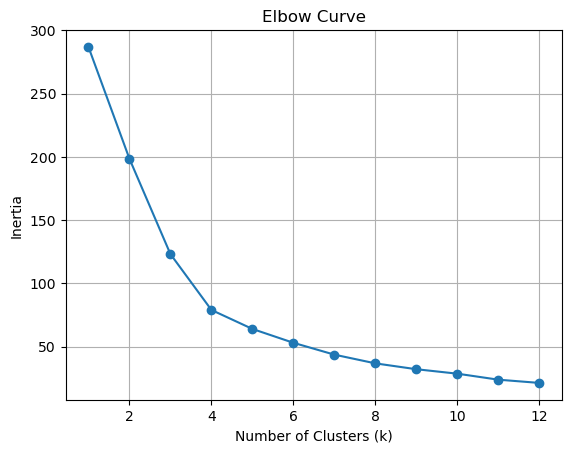

In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['Number of Clusters (k)'], elbow_df['Inertia'], marker='o')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

# Display grid
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [15]:
# Initialize the K-Means model using the best value for k
best_kmeans_model = KMeans(n_clusters=4, random_state= 13)
best_kmeans_model.fit(scaled)

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=13)

In [16]:
# Fit the K-Means model using the scaled data


In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = best_kmeans_model.predict(scaled)
df_market_data['Cluster'] = clusters
# Print the resulting array of cluster values.
print(df_market_data)

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                   1.08388                     7.60278   
ethereum                                  0.22392                    10.38134   
tether                                   -0.21173                     0.04935   
ripple                                   -0.37819                    -0.60926   
bitcoin-cash                              2.90585                    17.09717   
binancecoin                               2.10423                    12.85511   
chainlink                                -0.23935                    20.69459   
cardano                                   0.00322                    13.99302   
litecoin                                 -0.06341                     6.60221   
bitcoin-cash-sv                           0.92530                     3.29641   
crypto-com-chain            

In [18]:
# Create a copy of the DataFrame
dfMarketData = pd.DataFrame(df_market_data)
dfMarketData.head(2)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3


In [19]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [36]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
Plot = df_market_data.hvplot.scatter(
    x = "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    c = clusters,
    hover_cols = "coin_id",
    colormap = "cool",
    title = "Scatter plot"
)
Plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,_color,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [51]:
# Create a PCA model instance and set `n_components=3`.
pcaModel = PCA(n_components=3)

In [53]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pcaComponents = pcaModel.fit_transform(df)
# View the first five rows of the DataFrame. 
pcaComponents[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [54]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explainedVarianceRatio = pcaModel.explained_variance_ratio_

for i, variance in enumerate(explainedVarianceRatio):
    print(f"Explained variance for Principal Component {i+1}: {variance:.4f}")


Explained variance for Principal Component 1: 0.3720
Explained variance for Principal Component 2: 0.3470
Explained variance for Principal Component 3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3720 + 0.3470 + 0.1760 = **0.8950**


In [60]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    pcaComponents,
    columns=['PCA1', 'PCA2', 'PCA3']
    )
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
coin_id = df_market_data.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head())

KeyError: "None of ['coin_id'] are in the columns"

---

### Find the Best Value for k Using the PCA Data

In [25]:
# Create a list with the number of k-values from 1 to 11


In [26]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [27]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Initialize the K-Means model using the best value for k


In [30]:
# Fit the K-Means model using the PCA data

In [31]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [32]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [33]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [34]:
# Composite plot to contrast the Elbow curves

In [35]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 